In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from tqdm import trange

In [ ]:
train_df['discourse_text'].values

In [ ]:
train_df = pd.read_csv("./input/train.csv")
tokenizer = Tokenizer()
texts = [x.lower() for x in train_df['discourse_text'].values]
tokenizer.fit_on_texts(texts)
total_words = len(tokenizer.word_index) + 1
# print(tokenizer.word_index)
# print(total_words)

In [39]:
input_sequences = []

for text in tqdm(texts):
    # print(text)
    token_list = tokenizer.texts_to_sequences(text)
    # print(token_list)
    for i in range(1,len(token_list)):
        ngram_sequences = token_list[:i+1]
        input_sequences.append(ngram_sequences)

max_sequences_len = max([len(x) for x in input_sequences])


        

100%|██████████| 36765/36765 [01:55<00:00, 319.38it/s]


In [5]:
import spacy

In [6]:
nlp = spacy.load("en_core_web_lg")

In [244]:
texts_tensor = []
for x in tqdm(train_df['discourse_text']):
    texts_tensor.append(nlp(x).vector)

100%|██████████| 36765/36765 [06:07<00:00, 99.97it/s] 


In [245]:
texts_tensor = tf.reshape(texts_tensor,[36765,1,300])

In [110]:
texts_tensor

<tf.Tensor: shape=(1, 10, 300), dtype=float32, numpy=
array([[[-1.7310259 ,  1.2019125 , -3.6277354 , ...,  0.0363916 ,
         -2.994872  ,  1.4502984 ],
        [-0.8571301 ,  1.7046484 , -3.1711113 , ..., -0.6690958 ,
         -4.5095615 ,  1.7122338 ],
        [-0.7345443 ,  3.1622272 , -2.7153568 , ...,  0.02443947,
         -3.869576  ,  2.00546   ],
        ...,
        [-3.285236  ,  0.88648003, -2.619274  , ..., -0.62785   ,
         -2.2943168 ,  4.129184  ],
        [-1.8806963 ,  2.1315725 , -3.1053443 , ..., -0.08605026,
         -2.4896052 ,  2.1499102 ],
        [-2.3043728 ,  0.34056365, -2.421952  , ..., -1.7717329 ,
         -2.6810198 ,  0.9267128 ]]], dtype=float32)>

In [ ]:
for x in texts_tensor:
    print(x.shape)
    for y in x:
        print(y.shape)

In [248]:
model = tf.keras.Sequential()
# model.add(keras.layers.Embedding(total_words, 100, input_length=max_sequences_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [65]:
layers = keras.layers.Bidirectional(keras.layers.LSTM(150))

In [249]:
labels = train_df['discourse_effectiveness']

In [250]:
def get_label(Keys,values,features):
    init = tf.lookup.KeyValueTensorInitializer(Keys,values)
    table = tf.lookup.StaticHashTable(init,default_value=-1)
    return table.lookup(tf.constant(features))

In [133]:
TARGET = tf.constant(['Adequate', 'Effective','Ineffective'])

TARGET_LABELS = tf.constant([0,1,2])
y_train = tf.one_hot(get_label( TARGET, TARGET_LABELS, labels[:200]),3)

In [251]:

y_train_batch = tf.one_hot(get_label( TARGET, TARGET_LABELS, labels),3)

In [253]:
y_train_batch.shape

TensorShape([36765, 3])

In [125]:
y_train = tf.reshape(y_train,[10,3])

In [ ]:

ys = tf.keras.utils.to_categorical(labels[:10], num_classes=3)

In [254]:
texts_tensor.shape

TensorShape([36765, 1, 300])

In [258]:
36765 - 36765 * 0.2

29412.0

In [259]:
# layers(tf.reshape(text_1,[1,1,300]))
model.fit(texts_tensor[:29412],y_train_batch[:29412],epochs=100,verbose=1,validation_data=(texts_tensor[29412:],y_train_batch[29412:]))

Epoch 1/100
920/920 [==============================] - 14s 15ms/step - loss: 0.8244 - accuracy: 0.6297 - val_loss: 0.8369 - val_accuracy: 0.6154
Epoch 2/100
920/920 [==============================] - 14s 15ms/step - loss: 0.8110 - accuracy: 0.6355 - val_loss: 0.8736 - val_accuracy: 0.6119
Epoch 3/100
920/920 [==============================] - 14s 15ms/step - loss: 0.8007 - accuracy: 0.6389 - val_loss: 0.8775 - val_accuracy: 0.6047
Epoch 4/100
920/920 [==============================] - 15s 16ms/step - loss: 0.7960 - accuracy: 0.6431 - val_loss: 0.8793 - val_accuracy: 0.6087
Epoch 5/100
920/920 [==============================] - 14s 15ms/step - loss: 0.7884 - accuracy: 0.6455 - val_loss: 0.8539 - val_accuracy: 0.6108
Epoch 6/100
920/920 [==============================] - 14s 16ms/step - loss: 0.7791 - accuracy: 0.6515 - val_loss: 0.8550 - val_accuracy: 0.6219
Epoch 7/100
920/920 [==============================] - 15s 16ms/step - loss: 0.7735 - accuracy: 0.6511 - val_loss: 0.8916 - val_ac

In [67]:
y_train.shape

TensorShape([200, 3])

In [135]:
text_batches = tf.data.Dataset.from_tensor_slices(texts_tensor).batch(32)
y_batches = tf.data.Dataset.from_tensor_slices(y_train).batch(32)

In [242]:
def get_vector(X_b):
    # print((X_b)))
    print(X_b.apply(lambda x : x))
    # X_b.map(lambda x : nlp(str(x).vector))
    # return nlp.(X_b).vector

In [149]:
train_batches = tf.data.Dataset.from_tensor_slices(train_df['discourse_text'].values).batch(32)
train_y_batches = tf.data.Dataset.from_tensor_slices(y_train_batch).batch(32)

In [151]:
dataset_batch = tf.data.Dataset.zip((train_batches,train_y_batches))

In [228]:
train_batches.take(1)

<TakeDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>

In [243]:
train_batches.batch(32).apply(get_vector)
# list(dataset_batch.take(1).as_numpy_iterator())

<BatchDataset element_spec=TensorSpec(shape=(None, None), dtype=tf.string, name=None)>


TypeError: `transformation_func` must return a `tf.data.Dataset` object. Got <class 'NoneType'>.

In [136]:
data_set = tf.data.Dataset.zip( (text_batches , y_batches) )

In [ ]:
for x_batch, y_batch in data_set.batch(10):
    for x in x_batch:
        for y in x:
            print(y.shape)


In [207]:
inputs = tf.random.normal([32, 10, 8])

In [55]:
data_set

<ZipDataset element_spec=(TensorSpec(shape=(None, 2, 300), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

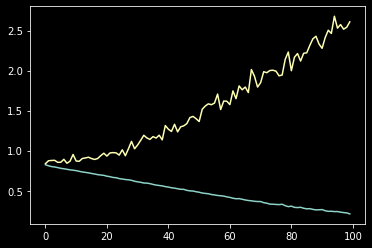

In [269]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
# plt.plot(model.history.history['accuracy'])
# plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['val_loss'])
plt.show()

In [270]:
test_df = pd.read_csv("./input/test.csv")

In [274]:
test_df['discourse_text'].shape

(10,)

In [272]:
test_tensor = []
for x in tqdm(test_df['discourse_text']):
    test_tensor.append(nlp(x).vector)

100%|██████████| 10/10 [00:00<00:00, 102.96it/s]


In [277]:
test_tensor = tf.reshape(test_tensor,[10,1,300])

SyntaxError: unmatched ')' (260402360.py, line 1)

In [273]:
pred = model.predict(test_tensor)

ValueError: in user code:

    File "C:\Users\barka\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\barka\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\barka\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\barka\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\barka\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\barka\AppData\Roaming\Python\Python310\site-packages\keras\engine\input_spec.py", line 214, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_9" (type Sequential).
    
    Input 0 of layer "bidirectional_16" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_9" (type Sequential):
      • inputs=('tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)')
      • training=False
      • mask=None
